In [1]:
import numpy as np #matrices
import pandas as pd #importing data mostly
from matplotlib import pyplot as plt #visualisation

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape #m=num of images, n = pixels+1
np.random.shuffle(data) #to avoid overfitting to training data
#validation/development
data_dev = data[0:1000].T
Y_dev = data_dev[0] #labels -> 0-9
X_dev = data_dev[1:n] #pixel vals
X_dev = X_dev/255.

#train
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape


In [5]:
Y_train

array([4, 4, 3, ..., 5, 3, 9])

In [22]:
def init_params():
    #1st layer
    W1 = np.random.rand(30,784)-0.5#gen random vals bw 0&1 in a 10*784 matrix
    b1 = np.random.rand(30, 1)-0.5
    #2nd layer
    W2 = np.random.rand(10,30)-0.5 #gen random vals bw 0&1 in a 10*10 matrix
    b2 = np.random.rand(10, 1)-0.5
    return W1,b1,W2,b2
def ReLU(Z):
    return np.maximum(Z,0)
def softmax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A
    
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2
    
def one_hot(Y):
    # y has 41000 labels and max value is 9 but we have 0-9 thus +1
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    #going through each row and setting the corresponding index given in Y to 1
    # v cool
    one_hot_Y[np.arange(Y.size),Y]=1
    return one_hot_Y.T
    
def deriv_RELU():
    return Z>0
def back_prop(Z1,A1,Z2,A2,W1, W2, X, Y):
    # m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)*deriv_RELU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m*np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1, db1, dW2, db2,alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1,b1,W2,b2 

In [20]:
def loss(X,Y, A2):
    m = Y.size
    log_likelihood = - np.log(A2[Y,range(m)])
    loss = 1/m * np.sum(log_likelihood)
    return loss
    
def get_predictions(A2):
    return np.argmax(A2,0)
    
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1, db1, dW2, db2,alpha)
        if i % 10 == 0:
            print('Iteration: ', i)
            print('Accuracy: ', get_accuracy(get_predictions(A2),Y))
        iterations -= 1
    return W1,b1,W2,b2  

In [ ]:
W1,b1,W2,b2 = gradient_descent(X_train, Y_train, 750, 0.1)

Iteration:  0
[4 5 1 ... 4 4 4] [4 4 3 ... 5 3 9]
Accuracy:  0.10904878048780488
Iteration:  10
[4 5 1 ... 4 2 6] [4 4 3 ... 5 3 9]
Accuracy:  0.3153170731707317
Iteration:  20
[4 4 1 ... 4 8 4] [4 4 3 ... 5 3 9]
Accuracy:  0.4728292682926829
Iteration:  30
[4 4 1 ... 4 8 4] [4 4 3 ... 5 3 9]
Accuracy:  0.5613414634146342
Iteration:  40
[4 4 1 ... 4 8 4] [4 4 3 ... 5 3 9]
Accuracy:  0.6169756097560976
Iteration:  50
[4 4 1 ... 4 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.6578048780487805
Iteration:  60
[4 4 1 ... 4 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.6901463414634146
Iteration:  70
[4 4 1 ... 4 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.7160243902439024
Iteration:  80
[4 4 8 ... 4 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.7362195121951219
Iteration:  90
[4 4 8 ... 5 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.751609756097561
Iteration:  100
[4 4 8 ... 5 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.7649512195121951
Iteration:  110
[4 4 8 ... 5 8 9] [4 4 3 ... 5 3 9]
Accuracy:  0.7755609756097561
Iteration:  120
[4 4 8 ... 

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


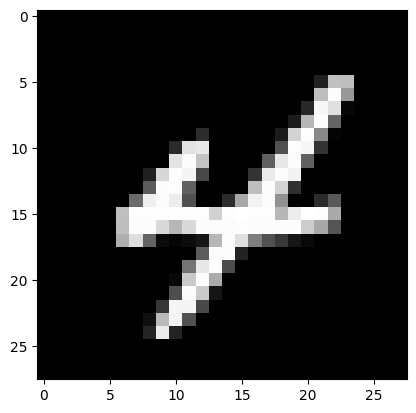

Prediction:  [4]
Label:  4


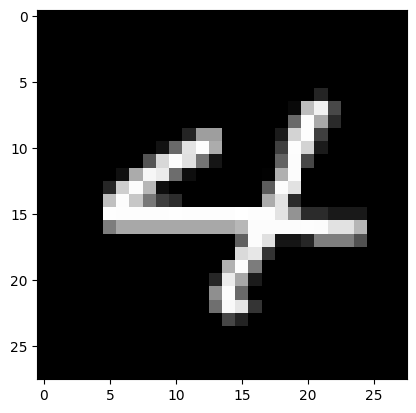

Prediction:  [3]
Label:  3


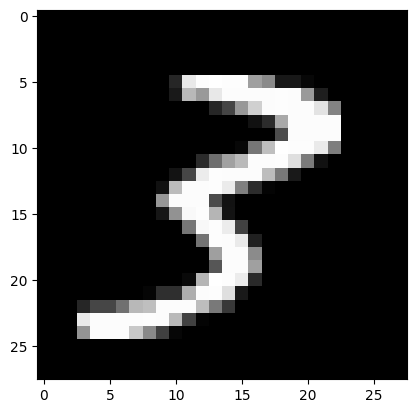

Prediction:  [0]
Label:  0


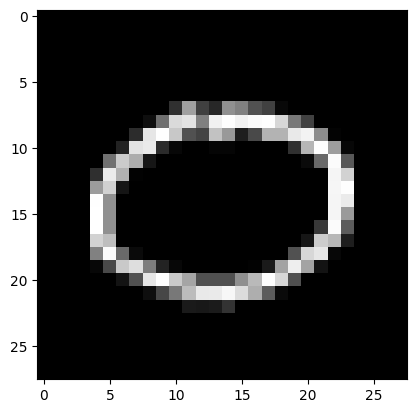

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 6 8 7 7 3 9 4 8 4 1 2 3 0 5 7 0 3 1 2 8 9 1 0 0 3 5 9 9 6 6 7 0 2 1 3 4
 2 8 9 2 6 4 2 8 5 2 0 7 0 5 8 1 0 1 3 8 0 8 5 7 5 1 6 6 7 2 9 0 1 5 1 5 2
 9 5 6 6 1 3 4 9 7 3 3 0 5 1 4 9 1 9 4 7 0 4 4 6 4 1 7 5 2 9 6 5 4 6 5 3 3
 8 0 1 6 0 9 1 6 4 9 0 1 3 4 5 0 3 5 1 9 1 4 7 8 8 9 6 1 0 6 6 2 7 5 1 6 8
 9 1 4 1 0 6 9 7 8 8 5 4 4 1 0 4 1 3 2 8 5 0 7 7 4 3 4 3 8 5 4 2 8 8 1 3 1
 3 3 8 1 1 9 7 1 0 1 6 2 6 3 7 8 7 4 2 1 0 2 2 0 2 9 5 7 7 6 2 2 6 2 6 4 1
 0 9 3 0 8 6 6 9 6 1 6 9 5 4 1 6 4 8 5 2 4 1 7 2 7 2 1 1 1 9 0 9 5 2 1 8 1
 1 3 5 1 9 8 0 8 2 7 2 4 6 6 6 0 9 5 8 6 4 8 1 3 3 3 7 9 2 6 1 2 3 6 8 8 1
 7 2 4 5 2 7 7 7 0 1 5 2 6 7 8 2 5 7 1 0 2 1 0 7 9 3 0 3 4 8 0 0 0 8 0 4 7
 7 0 1 6 2 6 0 7 2 9 2 1 7 4 3 1 3 7 6 6 7 9 8 8 2 0 8 6 1 0 8 4 1 4 8 3 0
 7 5 0 3 8 6 8 7 4 5 7 7 9 6 6 3 6 9 8 0 2 3 0 0 0 3 9 3 6 7 3 2 9 9 7 1 7
 7 8 2 1 1 0 8 9 3 8 0 1 9 4 1 0 9 8 6 1 2 6 9 5 5 3 1 1 6 7 2 5 1 3 3 2 5
 0 1 2 1 9 4 0 2 7 2 1 4 5 7 5 1 9 7 3 7 4 3 1 1 7 9 9 9 7 1 8 7 9 5 7 7 7
 0 5 4 6 6 3 7 0 8 9 4 4 

0.852

In [17]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = test_data.T/255.0
predictions = make_predictions(X_test, W1, b1, W2, b2)
submission = pd.DataFrame({
    'ImageId': range(1,len(predictions)+1),
    'Label': predictions
})
submission.to_csv('submission.csv', index=False)
print("submissions.csv file created successfully!")

submissions.csv file created successfully!
